Original Time Series Data before preprocessing :
            Temperature
Date                   
2023-01-01         30.0
2023-01-02         31.0
2023-01-03          NaN
2023-01-04         32.0
2023-01-05          NaN
2023-01-06         34.0
2023-01-07         33.0
2023-01-08          NaN
2023-01-09         35.0
2023-01-10         36.0
2023-01-11         37.0
2023-01-12          NaN
2023-01-13         38.0
2023-01-14         39.0
2023-01-15         40.0
2023-01-16          NaN
2023-01-17         41.0
2023-01-18         42.0
2023-01-19          NaN
2023-01-20         43.0

Time Series Data after Interpolation:
            Temperature
Date                   
2023-01-01         30.0
2023-01-02         31.0
2023-01-03         31.5
2023-01-04         32.0
2023-01-05         33.0
2023-01-06         34.0
2023-01-07         33.0
2023-01-08         34.0
2023-01-09         35.0
2023-01-10         36.0
2023-01-11         37.0
2023-01-12         37.5
2023-01-13         38.0
2023-01-14         39.0


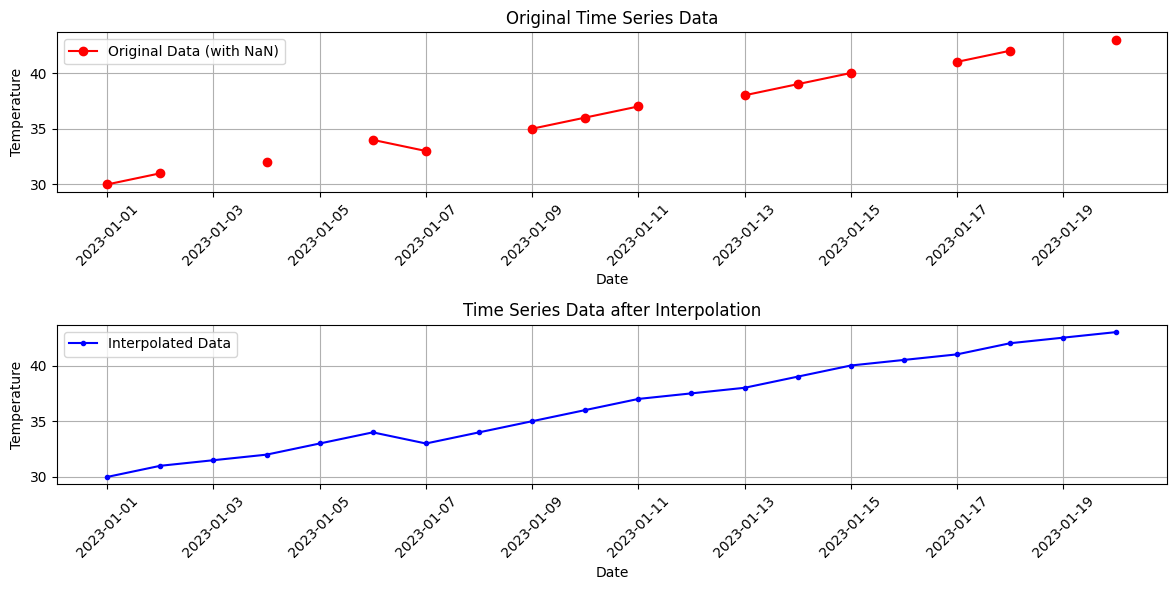

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a manual time series DataFrame with missing values
dates = pd.date_range(start='2023-01-01', periods=20, freq='D')
data = {
    'Date': dates,
    'Temperature': [30, 31, np.nan, 32, np.nan, 34, 33, np.nan, 35, 36,
                    37, np.nan, 38, 39, 40, np.nan, 41, 42, np.nan, 43]
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Step 2: Display original data
print("Original Time Series Data before preprocessing :")
print(df)

# Step 3: Handle missing values using interpolation
# Linear Interpolation
df_interpolated = df.interpolate(method='linear')

# Step 4: Display cleaned data
print("\nTime Series Data after Interpolation:")
print(df_interpolated)

# Step 5: Plot original vs interpolated data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Temperature'], 'ro-', label='Original Data (with NaN)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original Time Series Data')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Plot interpolated data
plt.subplot(2, 1, 2)
plt.plot(df_interpolated.index, df_interpolated['Temperature'], 'b.-', label='Interpolated Data')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data after Interpolation')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()
